In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

In [2]:
n = 2048
cov_nercome = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome_{n}.matrix")
cov_sample = np.loadtxt(f"../output/data/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample_{n}.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")

In [3]:
print(cov_nercome)
print(cov_sample)

[[ 2.37728750e+08  1.86183231e+07  1.03570124e+05 ...  9.13276634e+03
  -1.18322997e+04  2.27056595e+04]
 [ 1.86183231e+07  5.15030657e+07  4.75502070e+06 ...  9.45939194e+03
   9.60354453e+03 -1.40021352e+04]
 [ 1.03570124e+05  4.75502070e+06  1.69960413e+07 ... -6.47116108e+02
  -2.43492676e+03  6.82810232e+03]
 ...
 [ 9.13276634e+03  9.45939194e+03 -6.47116108e+02 ...  4.70964446e+03
   1.37057687e+03  4.15053802e+02]
 [-1.18322997e+04  9.60354453e+03 -2.43492676e+03 ...  1.37057687e+03
   4.35959285e+03  1.07992724e+03]
 [ 2.27056595e+04 -1.40021352e+04  6.82810232e+03 ...  4.15053802e+02
   1.07992724e+03  4.07420870e+03]]
[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.4912776

In [4]:
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [5]:
print(cov_real)

[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.49127765e+02 ...  4.22979902e+03
   1.28931823e+03  3.78440184e+02]
 [-1.21684291e+04  9.26311893e+03 -2.28200815e+03 ...  1.28931823e+03
   3.88691287e+03  1.00320951e+03]
 [ 2.21567909e+04 -1.41639754e+04  6.76773412e+03 ...  3.78440184e+02
   1.00320951e+03  3.62984716e+03]]


In [6]:
evals_nercome = np.linalg.eigvalsh(cov_nercome)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

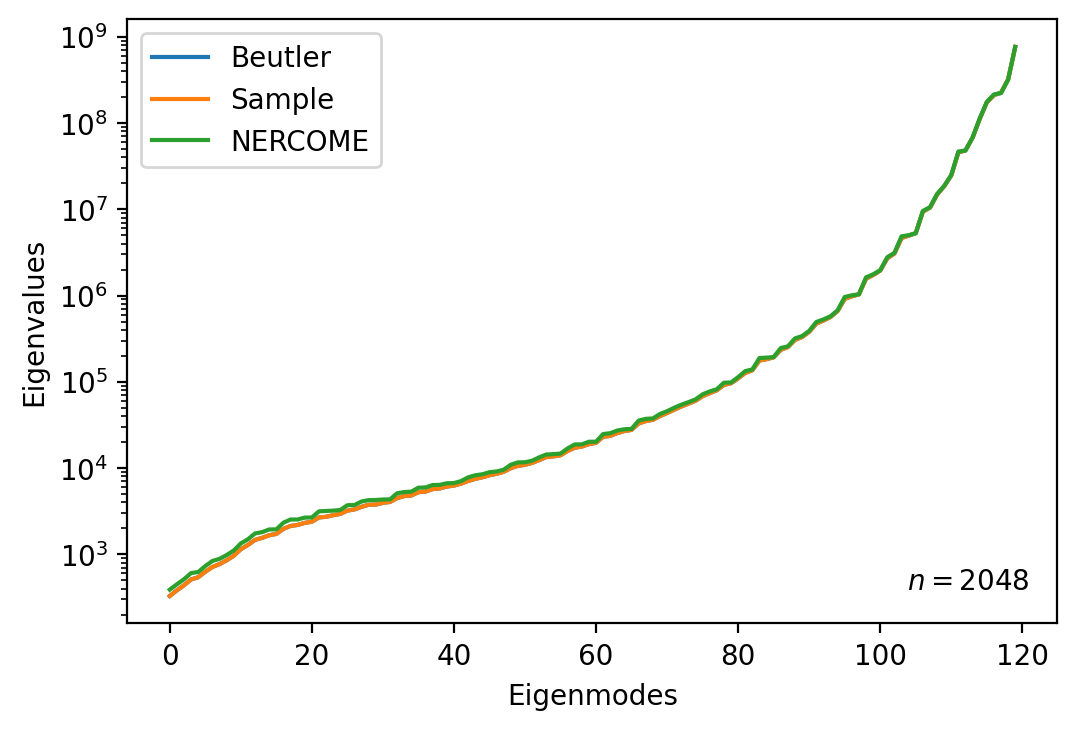

In [7]:
plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome, label="NERCOME")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")

parameters = AnchoredText(fr"$n = {n}$", frameon=False, loc="lower right", pad=0.5)
plt.setp(parameters.patch, facecolor='white', alpha=0.5)
plt.gca().add_artist(parameters)

In [8]:
nercome_rel_errors = (cov_nercome-cov_real)/np.abs(cov_real)
print(nercome_rel_errors)

[[-0.00752779 -0.02548177 -0.28095596 ... -0.05661423  0.02762308
   0.02477202]
 [-0.02548177 -0.00043872 -0.00600942 ...  0.03538839  0.03675065
   0.01142619]
 [-0.28095596 -0.00600942  0.01303812 ... -0.17844361 -0.06701055
   0.00892   ]
 ...
 [-0.05661423  0.03538839 -0.17844361 ...  0.11344403  0.0630245
   0.09674876]
 [ 0.02762308  0.03675065 -0.06701055 ...  0.0630245   0.12160807
   0.07647228]
 [ 0.02477202  0.01142619  0.00892    ...  0.09674876  0.07647228
   0.1224188 ]]


In [9]:
nercome_pos_count = 0
nercome_neg_count = 0
for row in nercome_rel_errors:
    for error in row:
        if error >= 0:
            nercome_pos_count += 1
        elif error < 0:
            nercome_neg_count += 1

print(f"NERCOME overestimated {nercome_pos_count} elements")
print(f"NERCOME underestimated {nercome_neg_count} elements")

index_max_nercome = np.unravel_index(np.abs(nercome_rel_errors).argmax(), nercome_rel_errors.shape)

print(f"Maximum relative error is {nercome_rel_errors[index_max_nercome]}")
print(f"Maximum relative error index is {index_max_nercome}")
print(f"NERCOME: {cov_nercome[index_max_nercome]}, real: {cov_real[index_max_nercome]}")

NERCOME overestimated 8790 elements
NERCOME underestimated 5610 elements
Maximum relative error is -1084.4443325423083
Maximum relative error index is (25, 54)
NERCOME: -39.917071501801644, real: -0.03677486749440995


In [10]:
sample_rel_errors = (cov_sample-cov_real)/np.abs(cov_real)
print(sample_rel_errors)

[[-2.48838028e-16  1.94988737e-16  2.62672433e-15 ... -2.25474996e-15
   2.98968648e-16 -4.92577488e-16]
 [ 3.89977475e-16 -2.89198780e-16  0.00000000e+00 ... -5.97298595e-16
   7.85476001e-16  0.00000000e+00]
 [ 5.05139294e-15  0.00000000e+00  0.00000000e+00 ... -7.45314009e-15
   0.00000000e+00 -1.34386884e-16]
 ...
 [-2.25474996e-15 -1.99099532e-16 -1.03515835e-14 ...  0.00000000e+00
   1.76351866e-16  1.50204501e-16]
 [ 7.47421620e-16  7.85476001e-16  5.97825233e-16 ...  1.76351866e-16
  -1.16994480e-16 -2.26646251e-16]
 [-3.28384992e-16  5.13694596e-16 -1.34386884e-16 ...  1.50204501e-16
  -2.26646251e-16 -3.75840081e-16]]


In [11]:
sample_pos_count = 0
sample_neg_count = 0
for row in sample_rel_errors:
    for error in row:
        if error >= 0:
            sample_pos_count += 1
        elif error < 0:
            sample_neg_count += 1

print(f"Sample overestimated {sample_pos_count} elements")
print(f"Sample underestimated {sample_neg_count} elements")

index_max_sample = np.unravel_index(np.abs(sample_rel_errors).argmax(), sample_rel_errors.shape)

print(f"Maximum relative error is {sample_rel_errors[index_max_sample]}")
print(f"Maximum relative error index is {index_max_sample}")
print(f"Sample: {cov_sample[index_max_sample]}, real: {cov_real[index_max_sample]}")

Sample overestimated 8004 elements
Sample underestimated 6396 elements
Maximum relative error is -4.374629044706546e-12
Maximum relative error index is (94, 80)
Sample: -13.315481811732752, real: -13.315481811674502


In [12]:
MSE_NERCOME = np.trace((cov_nercome-cov_real)@(cov_nercome-cov_real).T)
MSE_sample = np.trace((cov_sample-cov_real)@(cov_sample-cov_real).T)
print(f"MSE NERCOME: {MSE_NERCOME}")
print(f"MSE sample: {MSE_sample}")

MSE NERCOME: 47498685447885.91
MSE sample: 2.817816060272469e-14
